In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/ImageFaceData/ImageFaceData'

In [4]:
import os
files = os.listdir(path)

In [5]:
print(files)

['Srk', 'Ramcharan', 'Kiara', 'armas', 'Samantha', 'Tamanna', 'galgadot', 'Katrina', 'Tom', 'Mrunal']


In [6]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy,sparse_categorical_crossentropy
from matplotlib import pyplot as plt

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
data_importer = ImageDataGenerator(rescale=1/255)

In [9]:
data = data_importer.flow_from_directory(path)

Found 2784 images belonging to 10 classes.


In [10]:
data[0][0][0].shape

(256, 256, 3)

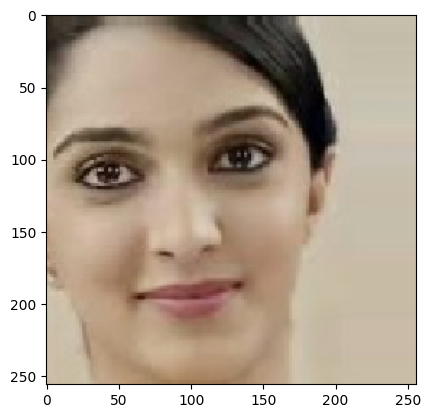

In [11]:
plt.imshow(data[0][0][0])
plt.show()

In [12]:
data.class_indices

{'Katrina': 0,
 'Kiara': 1,
 'Mrunal': 2,
 'Ramcharan': 3,
 'Samantha': 4,
 'Srk': 5,
 'Tamanna': 6,
 'Tom': 7,
 'armas': 8,
 'galgadot': 9}

In [13]:
inception = InceptionV3(include_top=False, input_shape=(256, 256, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [14]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [15]:
for layer in inception.layers:
    layer.trainable = False

In [16]:
model = Sequential()

In [17]:
model.add(inception)
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 73728)             0         
                                                                 
 dense (Dense)               (None, 10)                737290    
                                                                 
Total params: 22,540,074
Trainable params: 737,290
Non-trainable params: 21,802,784
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])

In [19]:
model.fit(data, verbose=1, epochs=30, validation_data=data)

Epoch 1/30
87/87 [==============================] - 1511s 17s/step - loss: 5.7478 - accuracy: 0.5158 - val_loss: 0.5523 - val_accuracy: 0.8861
Epoch 2/30
87/87 [==============================] - 22s 254ms/step - loss: 0.6226 - accuracy: 0.8822 - val_loss: 0.1378 - val_accuracy: 0.9591
Epoch 3/30
87/87 [==============================] - 22s 253ms/step - loss: 0.1436 - accuracy: 0.9598 - val_loss: 0.1161 - val_accuracy: 0.9702
Epoch 4/30
87/87 [==============================] - 23s 266ms/step - loss: 0.1702 - accuracy: 0.9634 - val_loss: 0.2602 - val_accuracy: 0.9558
Epoch 5/30
87/87 [==============================] - 21s 245ms/step - loss: 0.2567 - accuracy: 0.9508 - val_loss: 0.0856 - val_accuracy: 0.9813
Epoch 6/30
87/87 [==============================] - 22s 250ms/step - loss: 0.1514 - accuracy: 0.9659 - val_loss: 0.1309 - val_accuracy: 0.9720
Epoch 7/30
87/87 [==============================] - 22s 249ms/step - loss: 0.1142 - accuracy: 0.9752 - val_loss: 0.1112 - val_accuracy: 0.9720

In [20]:
model.save('model_inception_faceimages.h5')

In [22]:
from google.colab import files
files.download('model_inception_faceimages.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>